# SDSC2001 Course Project

Name: Ritvik Raina
SiD: 55828826

### Credit Card Fraud Detection

Credit card companies aim to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

## Module 1: Data Exploration

In [1]:
#import all relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline

In [3]:
#load the data
train = pd.read_csv("creditcard_train.csv") #training data
test = pd.read_csv("creditcard_test.csv") #testing data

In [4]:
train.head() #just to have a quick look at the dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
test.head() #just to have a quick look at the testing data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,40086,1.083693,1.179501,-1.346150,1.998824,0.818034,-0.771419,0.230307,0.093683,-0.167594,...,-0.312000,-0.639700,-0.120249,-0.180218,0.609283,-0.339524,0.096701,0.114972,1.00,1
1,93860,-10.850282,6.727466,-16.760583,8.425832,-10.252697,-4.192171,-14.077086,7.168288,-3.683242,...,2.541637,0.135535,-1.023967,0.406265,0.106593,-0.026232,-1.464630,-0.411682,78.00,1
2,14152,-4.710529,8.636214,-15.496222,10.313349,-4.351341,-3.322689,-10.788373,5.060381,-5.689311,...,1.990545,0.223785,0.554408,-1.204042,-0.450685,0.641836,1.605958,0.721644,1.00,1
3,27219,-25.266355,14.323254,-26.823673,6.349248,-18.664251,-4.647403,-17.971212,16.633103,-3.768351,...,1.780701,-1.861318,-1.188167,0.156667,1.768192,-0.219916,1.411855,0.414656,99.99,1
4,84204,-1.927453,1.827621,-7.019495,5.348303,-2.739188,-2.107219,-5.015848,1.205868,-4.382713,...,1.376938,-0.792017,-0.771414,-0.379574,0.718717,1.111151,1.277707,0.819081,512.25,1


In [6]:
print("The Training dataset has {} rows and {} columns".format(train.shape[0],train.shape[1]))
print("The Training dataset has {} rows and {} columns".format(test.shape[0],test.shape[1]))

The Training dataset has 284657 rows and 31 columns
The Training dataset has 150 rows and 31 columns


In [7]:
train["Class"].value_counts() #Classes and their counts
 
#0 - Not Fraud
#1 - Fraud

0    284215
1       442
Name: Class, dtype: int64

In [8]:
test["Class"].value_counts() #Classes and their counts

0    100
1     50
Name: Class, dtype: int64

In [9]:
print("The Training dataset has {} fraud transactions in {} total transactions".format(train["Class"].value_counts()[1], train.shape[0]))
print("The Testing dataset has {} fraud transactions in {} total transactions".format(test["Class"].value_counts()[1], test.shape[0]))

The Training dataset has 442 fraud transactions in 284657 total transactions
The Testing dataset has 50 fraud transactions in 150 total transactions


<AxesSubplot:ylabel='Class'>

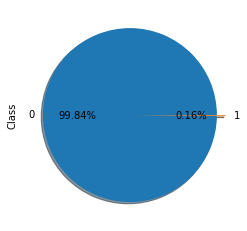

In [10]:
train["Class"].value_counts().plot.pie(autopct="%.2f%%",explode=[0,0.1], shadow=True)
#comparison of frauds vs normal transactions in the dataset

#### Observation 1.1
From a total 284,807 transcactions, 492 are labels as "fraud" transactions. 
From these, about 50 have been seperated into the testing set (10% of frauds) in a testing total of 150(0.05% of total transactions).

Therefore, we have 284,657 transactions to train the model with of which only 442 tractions are labeled as frauds (0.155%).
The dataset is highly unbalanced, and hence will not be trained well enough to tell fraud transactions apart from normal tractions. However the model will give a high accuracy because over 99.84% of the dataset is normal transactions and hence the accuracy metric will be high because the model will think it can identify a high number of normal transactions.

In [11]:
train.info() #summary of the dataframe

#we can see V22 and V23 are the only ones with null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284657 entries, 0 to 284656
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284657 non-null  float64
 1   V1      284657 non-null  float64
 2   V2      284657 non-null  float64
 3   V3      284657 non-null  float64
 4   V4      284657 non-null  float64
 5   V5      284657 non-null  float64
 6   V6      284657 non-null  float64
 7   V7      284657 non-null  float64
 8   V8      284657 non-null  float64
 9   V9      284657 non-null  float64
 10  V10     284657 non-null  float64
 11  V11     284657 non-null  float64
 12  V12     284657 non-null  float64
 13  V13     284657 non-null  float64
 14  V14     284657 non-null  float64
 15  V15     284657 non-null  float64
 16  V16     284657 non-null  float64
 17  V17     284657 non-null  float64
 18  V18     284657 non-null  float64
 19  V19     284657 non-null  float64
 20  V20     284657 non-null  float64
 21  V21     28

In [12]:
#numerical summary of Time and Amount
train[['Time', 'Amount']].describe()

,Time,Amount
count,284657.000000,284657.000000
mean,94820.043168,88.340966
std,47486.331846,250.129519
min,0.000000,0.000000
25%,54208.000000,5.600000
50%,84704.000000,22.000000
75%,139324.000000,77.150000
max,172792.000000,25691.160000


In [13]:
train[train["Amount"]==train["Amount"].max()] #the largest transaction

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
274629,166198.0,-35.54854,-31.85048,-48.32559,15.30418,-113.7433,73.30163,120.5895,-27.34736,-3.872425,...,-21.62012,5.712303,-1.581098,4.584549,4.554683,3.415636,31.6122,-15.43008,25691.16,0


<AxesSubplot:title={'center':'Vizualization of the distribution of the amount'}, xlabel='Amount', ylabel='Density'>

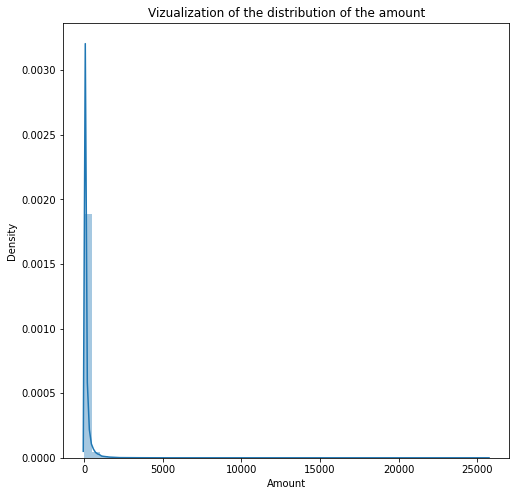

In [14]:
plt.figure(figsize=(8,8))
plt.title('Vizualization of the distribution of the amount')
sns.distplot(train["Amount"])

#### Observation 1.2

We can see that the mean transaction amount is only 88euros, and from the plot we can infer that most transactions are of a lower amount. However, the highest amount transacted is 25691.16 Euros, which was a normal transaction.

In [15]:
#checking for null values in the dataset

train.isnull().sum()
#V22 and V23 have 278 and 520 null values each

Time        0
V1          0
V2          0
V3          0
V4          0
V5          0
V6          0
V7          0
V8          0
V9          0
V10         0
V11         0
V12         0
V13         0
V14         0
V15         0
V16         0
V17         0
V18         0
V19         0
V20         0
V21         0
V22       278
V23       520
V24         0
V25         0
V26         0
V27         0
V28         0
Amount      0
Class       0
dtype: int64

In [16]:
#dropping the NaN values
train.dropna(axis=0,inplace=True)
train["Class"].value_counts() #Classes and their counts

0    283417
1       442
Name: Class, dtype: int64

#### Observation 1.3

After dropping the NaN rows from V22 and V23, as can be seen from the value counts only the normal transactions were dropped and no fraud transactions. Which is good for training the model later.

In [17]:
#checking for duplicate entries
train.duplicated(subset=None,keep="first").value_counts()

False    282783
True       1076
dtype: int64

In [18]:
train[train.duplicated()] #the duplicates

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282838,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283334,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287218,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283336,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284042,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [19]:
f_dup = len(train[train.duplicated()][train["Class"]==1])
nf_dup = len(train[train.duplicated()][train["Class"]==0])
print("Their are {} fraud duplicates and {} non-fraud duplicates".format(f_dup,nf_dup))

Their are 15 fraud duplicates and 1061 non-fraud duplicates


#### Observation 1.4

Based on the above, we can see that in the entire data set  there are 1076 duplicate rows of which 15 are fraud transactions and 1061 are non-fraud. However, as can be seen from the sub-dataframe only a few are complete duplicates and the rest have a few matching row values only.

Dropping 15 of 442 values leads to a 3.39% reduction, whereas 1061 of 283417 leads to a 0.37% reduction. This is not a good trade off, hence I have decidded to keep the duplicates.

In [20]:
train_wout = train.copy(deep=True) #makes a deep copy of the train dataframe
train_wout["Amount"].describe() #summary

count    283859.000000
mean         88.425282
std         250.417781
min           0.000000
25%           5.600000
50%          22.000000
75%          77.250000
max       25691.160000
Name: Amount, dtype: float64

In [21]:
#removing extreme outliers in the copy

df0=train_wout[train_wout['Class']==0] #sub dataframe of only non-fraud cases
df1=train_wout[train_wout['Class']==1] #sub dataframe of only fraud cases
features=train_wout.columns.values[1:29] #colums other than "Time" and "Amount"

for i in features: #loop running through each column to remove outliers
    d1=df1[i].describe() #stores the numerical summary of the dataframe
    l_bound1=d1[4]-2.5*(d1[6]-d1[4]) #calculates the lower bounds for outliers
    u_bound1=d1[4]+2.5*(d1[6]-d1[4]) #calculates the upper bounds for outliers
    
    d0=df0[i].describe()
    l_bound0=d0[4]-2.5*(d0[6]-d0[4])
    u_bound0=d0[4]+2.5*(d0[6]-d0[4])
    
    drop_values = train_wout[(((train_wout[i]<l_bound1) | (train_wout[i]>u_bound1)) & (train_wout['Class']==1)) 
                            | (((train_wout[i]<l_bound0) | (train_wout[i]>u_bound0)) & (train_wout['Class']==0))]
    
    train_wout.drop(drop_values.index, inplace=True)

In [22]:
print("The original training data set has {} frauds and {} non-frauds".format(train["Class"].value_counts()[1],train["Class"].value_counts()[0]))
print("The training data set with extreme outliers dropped has {} frauds and {} non-frauds".format(train_wout["Class"].value_counts()[1],train_wout["Class"].value_counts()[0]))

The original training data set has 442 frauds and 283417 non-frauds
The training data set with extreme outliers dropped has 292 frauds and 179726 non-frauds


In [23]:
train_wout.shape

(180018, 31)

#### Observation 1.4

I made a copy of the original data frame called train_out and removed all extreme outliers from the dataframe from every feature column except Time and Amount.

I wanted to continue from here by making comparisons between the dataset with and without outliers to see how they will affect the model.

As can be seen, with the outliers our dataset has 442 fraud transactions and 283417 non-frauds for a total of 283,859 transactions. The dataset with outliers removed has 292 fraud transactions with 179726 non-frauds for a total of 180,018 transactions.

We see a 66% drop in frauds and 63% drop in non-frauds. 
In the original, 0.155% of the set are frauds.
With outliers dropped, 0.162% of the set are frauds, which should be better for training the models.

## Module 2: Data Visualization

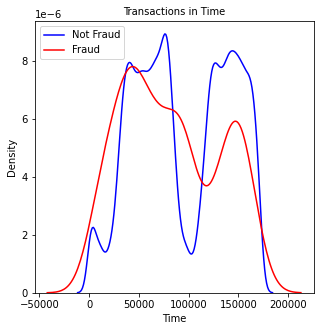

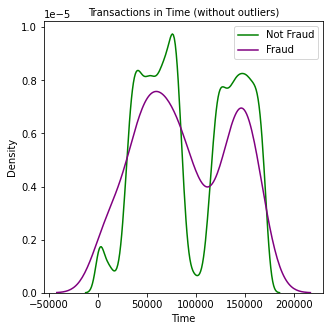

In [24]:
#1. Transactions and time distribution

plt.figure(1, figsize=(5,5))
sns.distplot(train[train['Class'] == 0]["Time"], color='blue',hist = False, label = 'Not Fraud');
sns.distplot(train[train['Class'] == 1]["Time"], color='red',hist = False, label = 'Fraud');
#fig.tight_layout()
plt.title('Transactions in Time', fontsize=10);
plt.legend()

plt.figure(2, figsize=(5,5))
sns.distplot(train_wout[train_wout['Class'] == 0]["Time"], color='green',hist = False, label = 'Not Fraud');
sns.distplot(train_wout[train_wout['Class'] == 1]["Time"], color='purple',hist = False, label = 'Fraud');
#fig.tight_layout()
plt.title('Transactions in Time (without outliers)', fontsize=10);
plt.legend()

plt.show()

<Figure size 432x288 with 0 Axes>

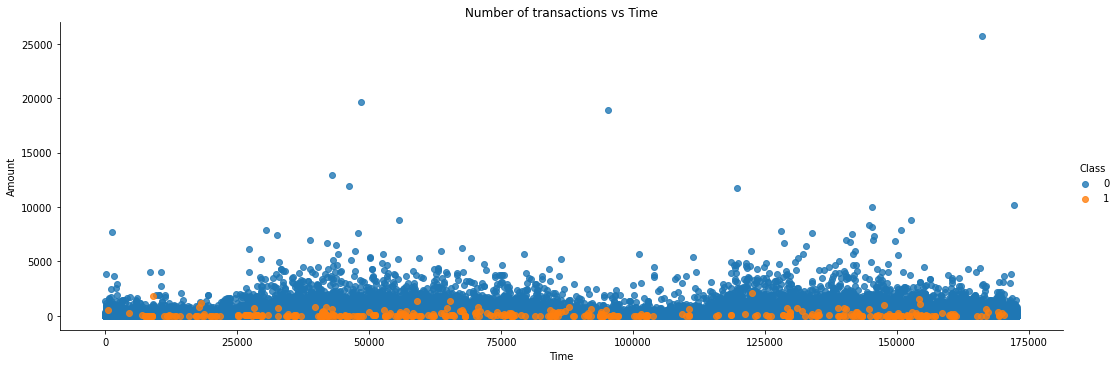

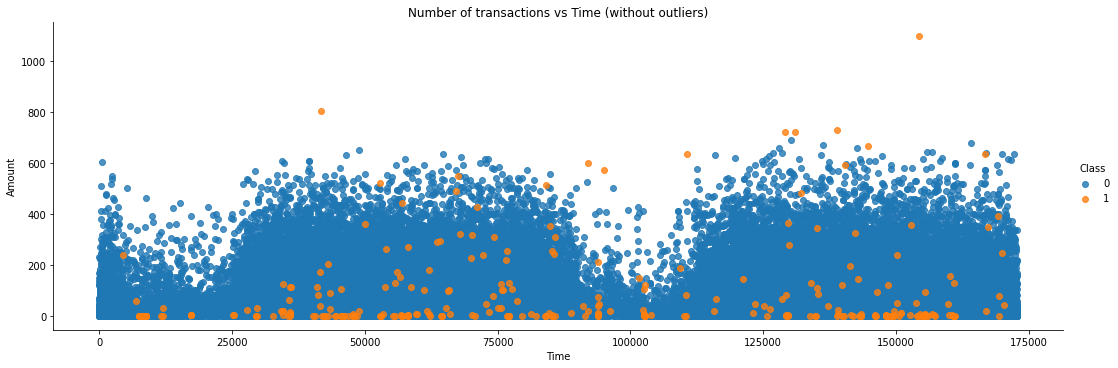

In [25]:
#2.  Transactions and time scatter

plt.figure(1)
sns.lmplot(data=train, x="Time",y="Amount",hue="Class", fit_reg=False, aspect=3)
plt.title("Number of transactions vs Time")

plt.figure(2)
sns.lmplot(data=train_wout, x="Time",y="Amount",hue="Class", fit_reg=False, aspect=3)
plt.title("Number of transactions vs Time (without outliers)")

plt.show()

<Figure size 432x288 with 0 Axes>

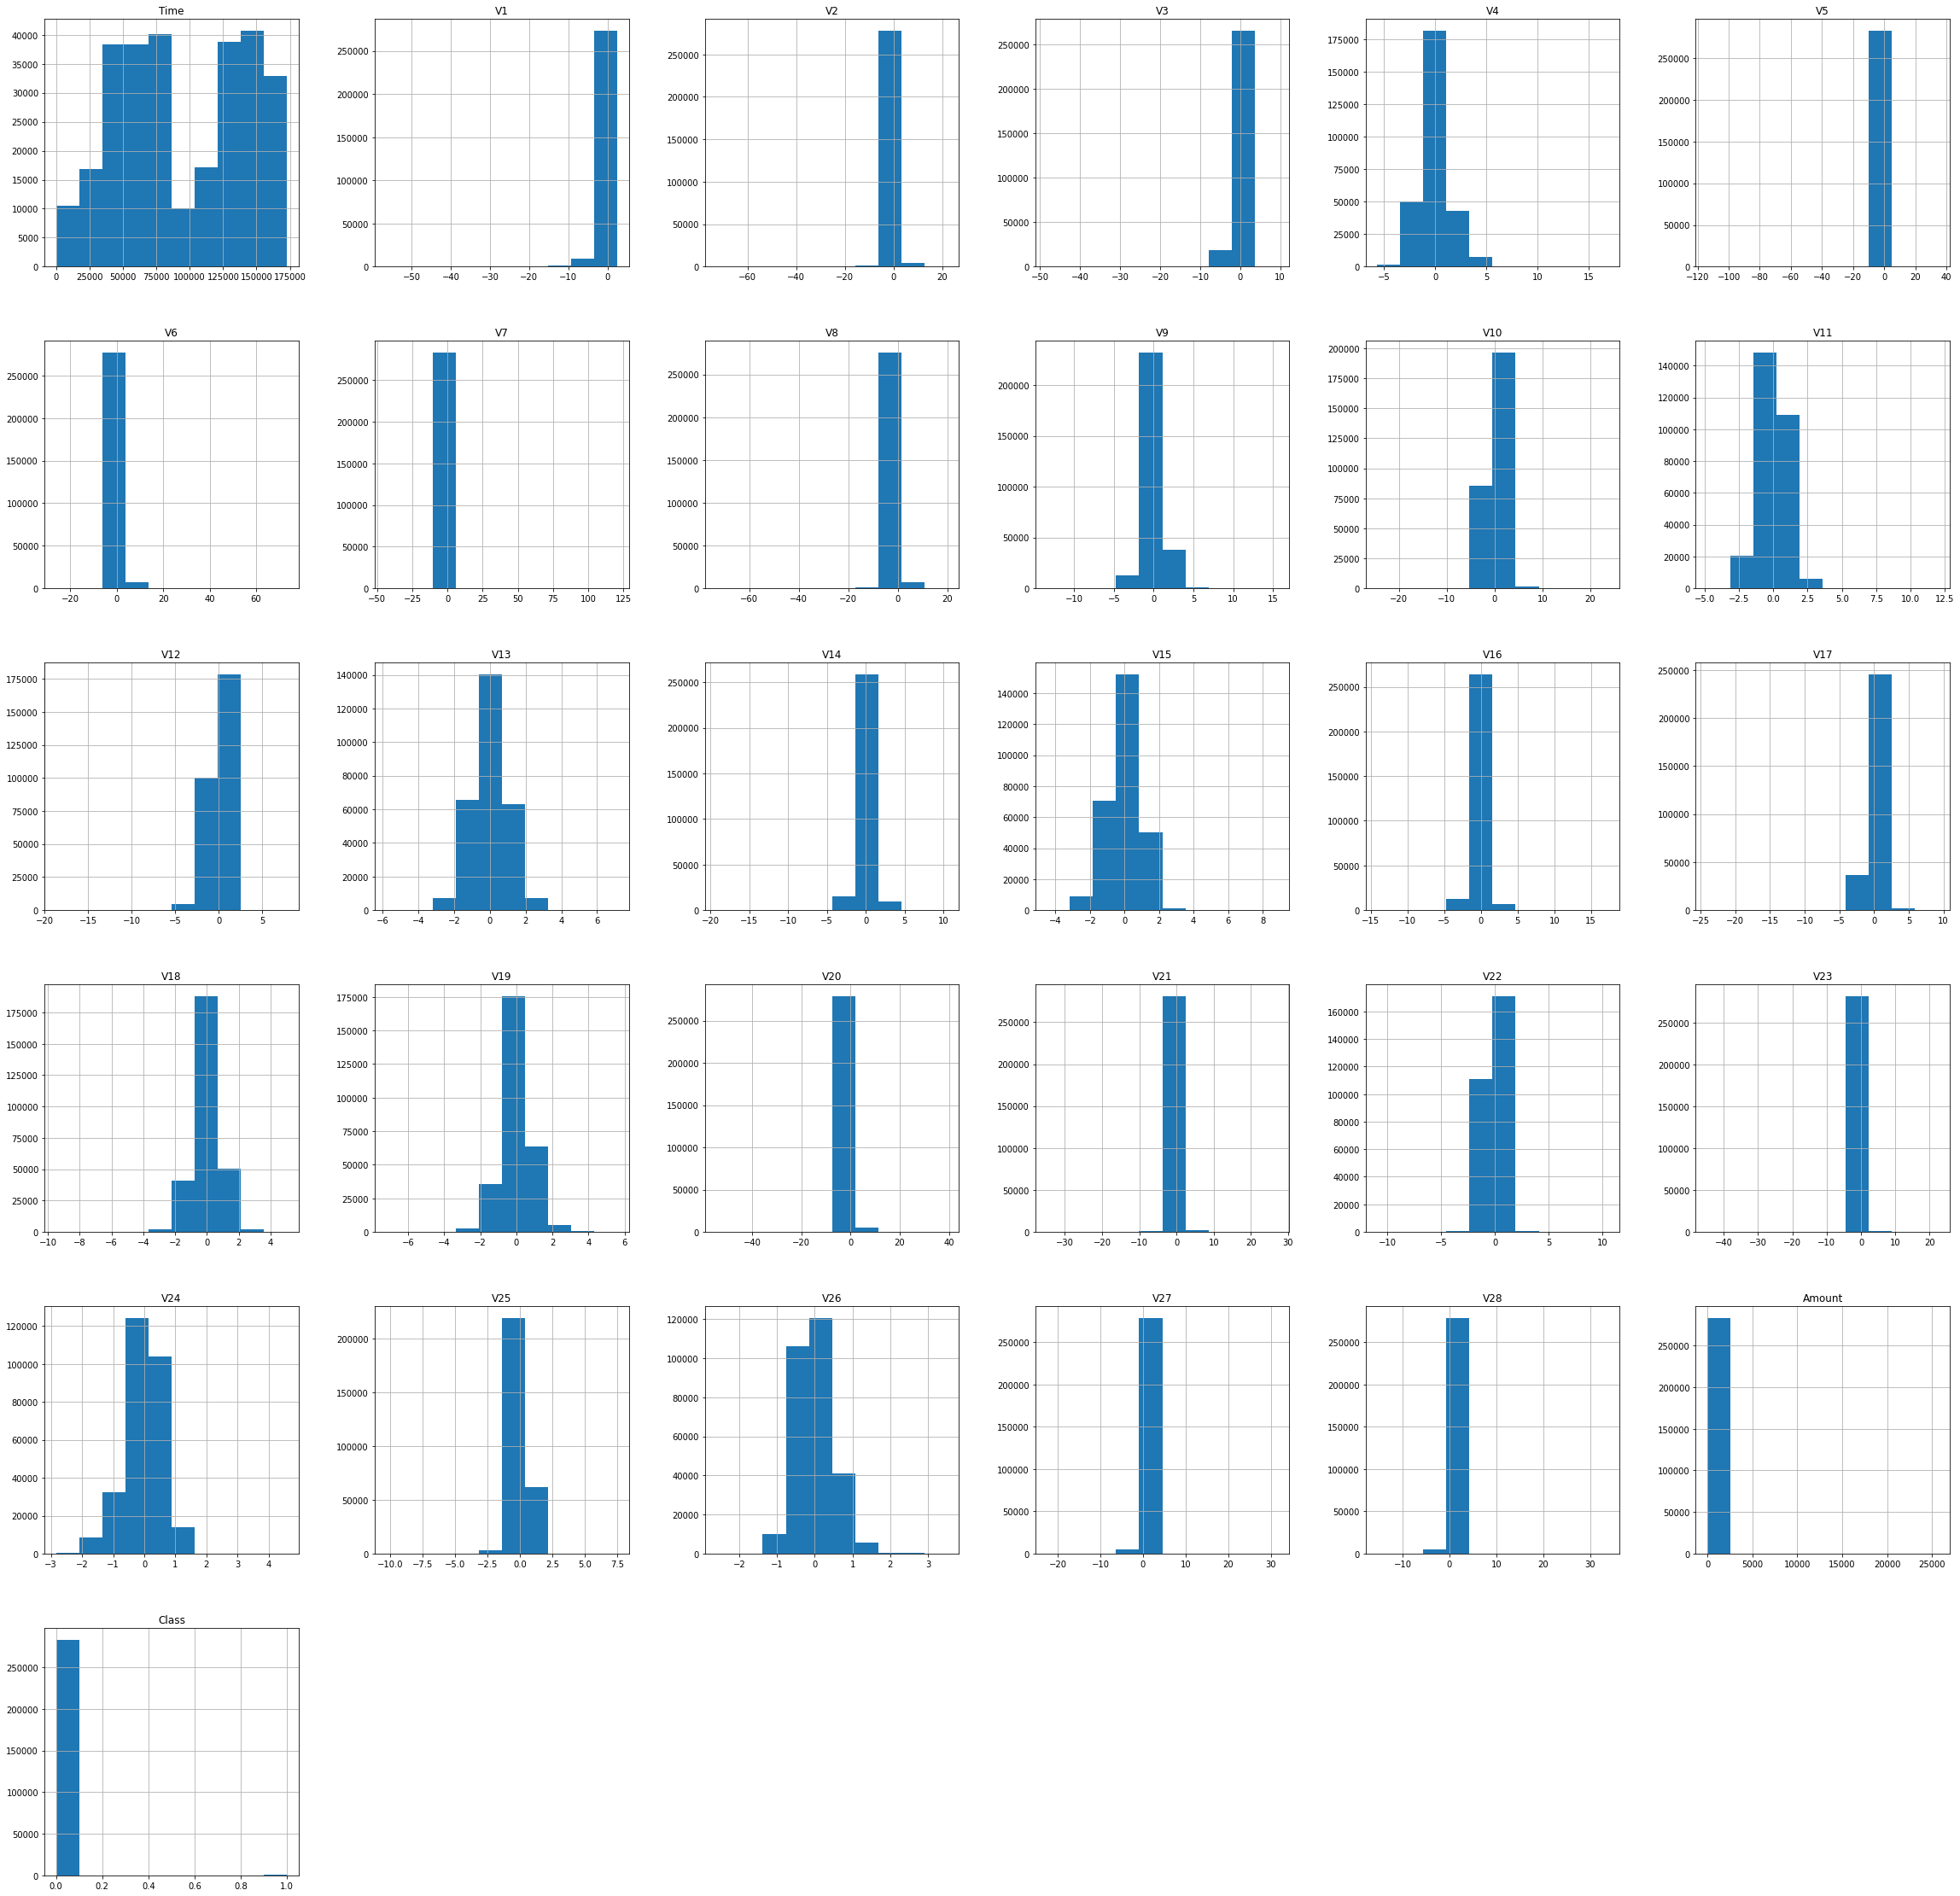

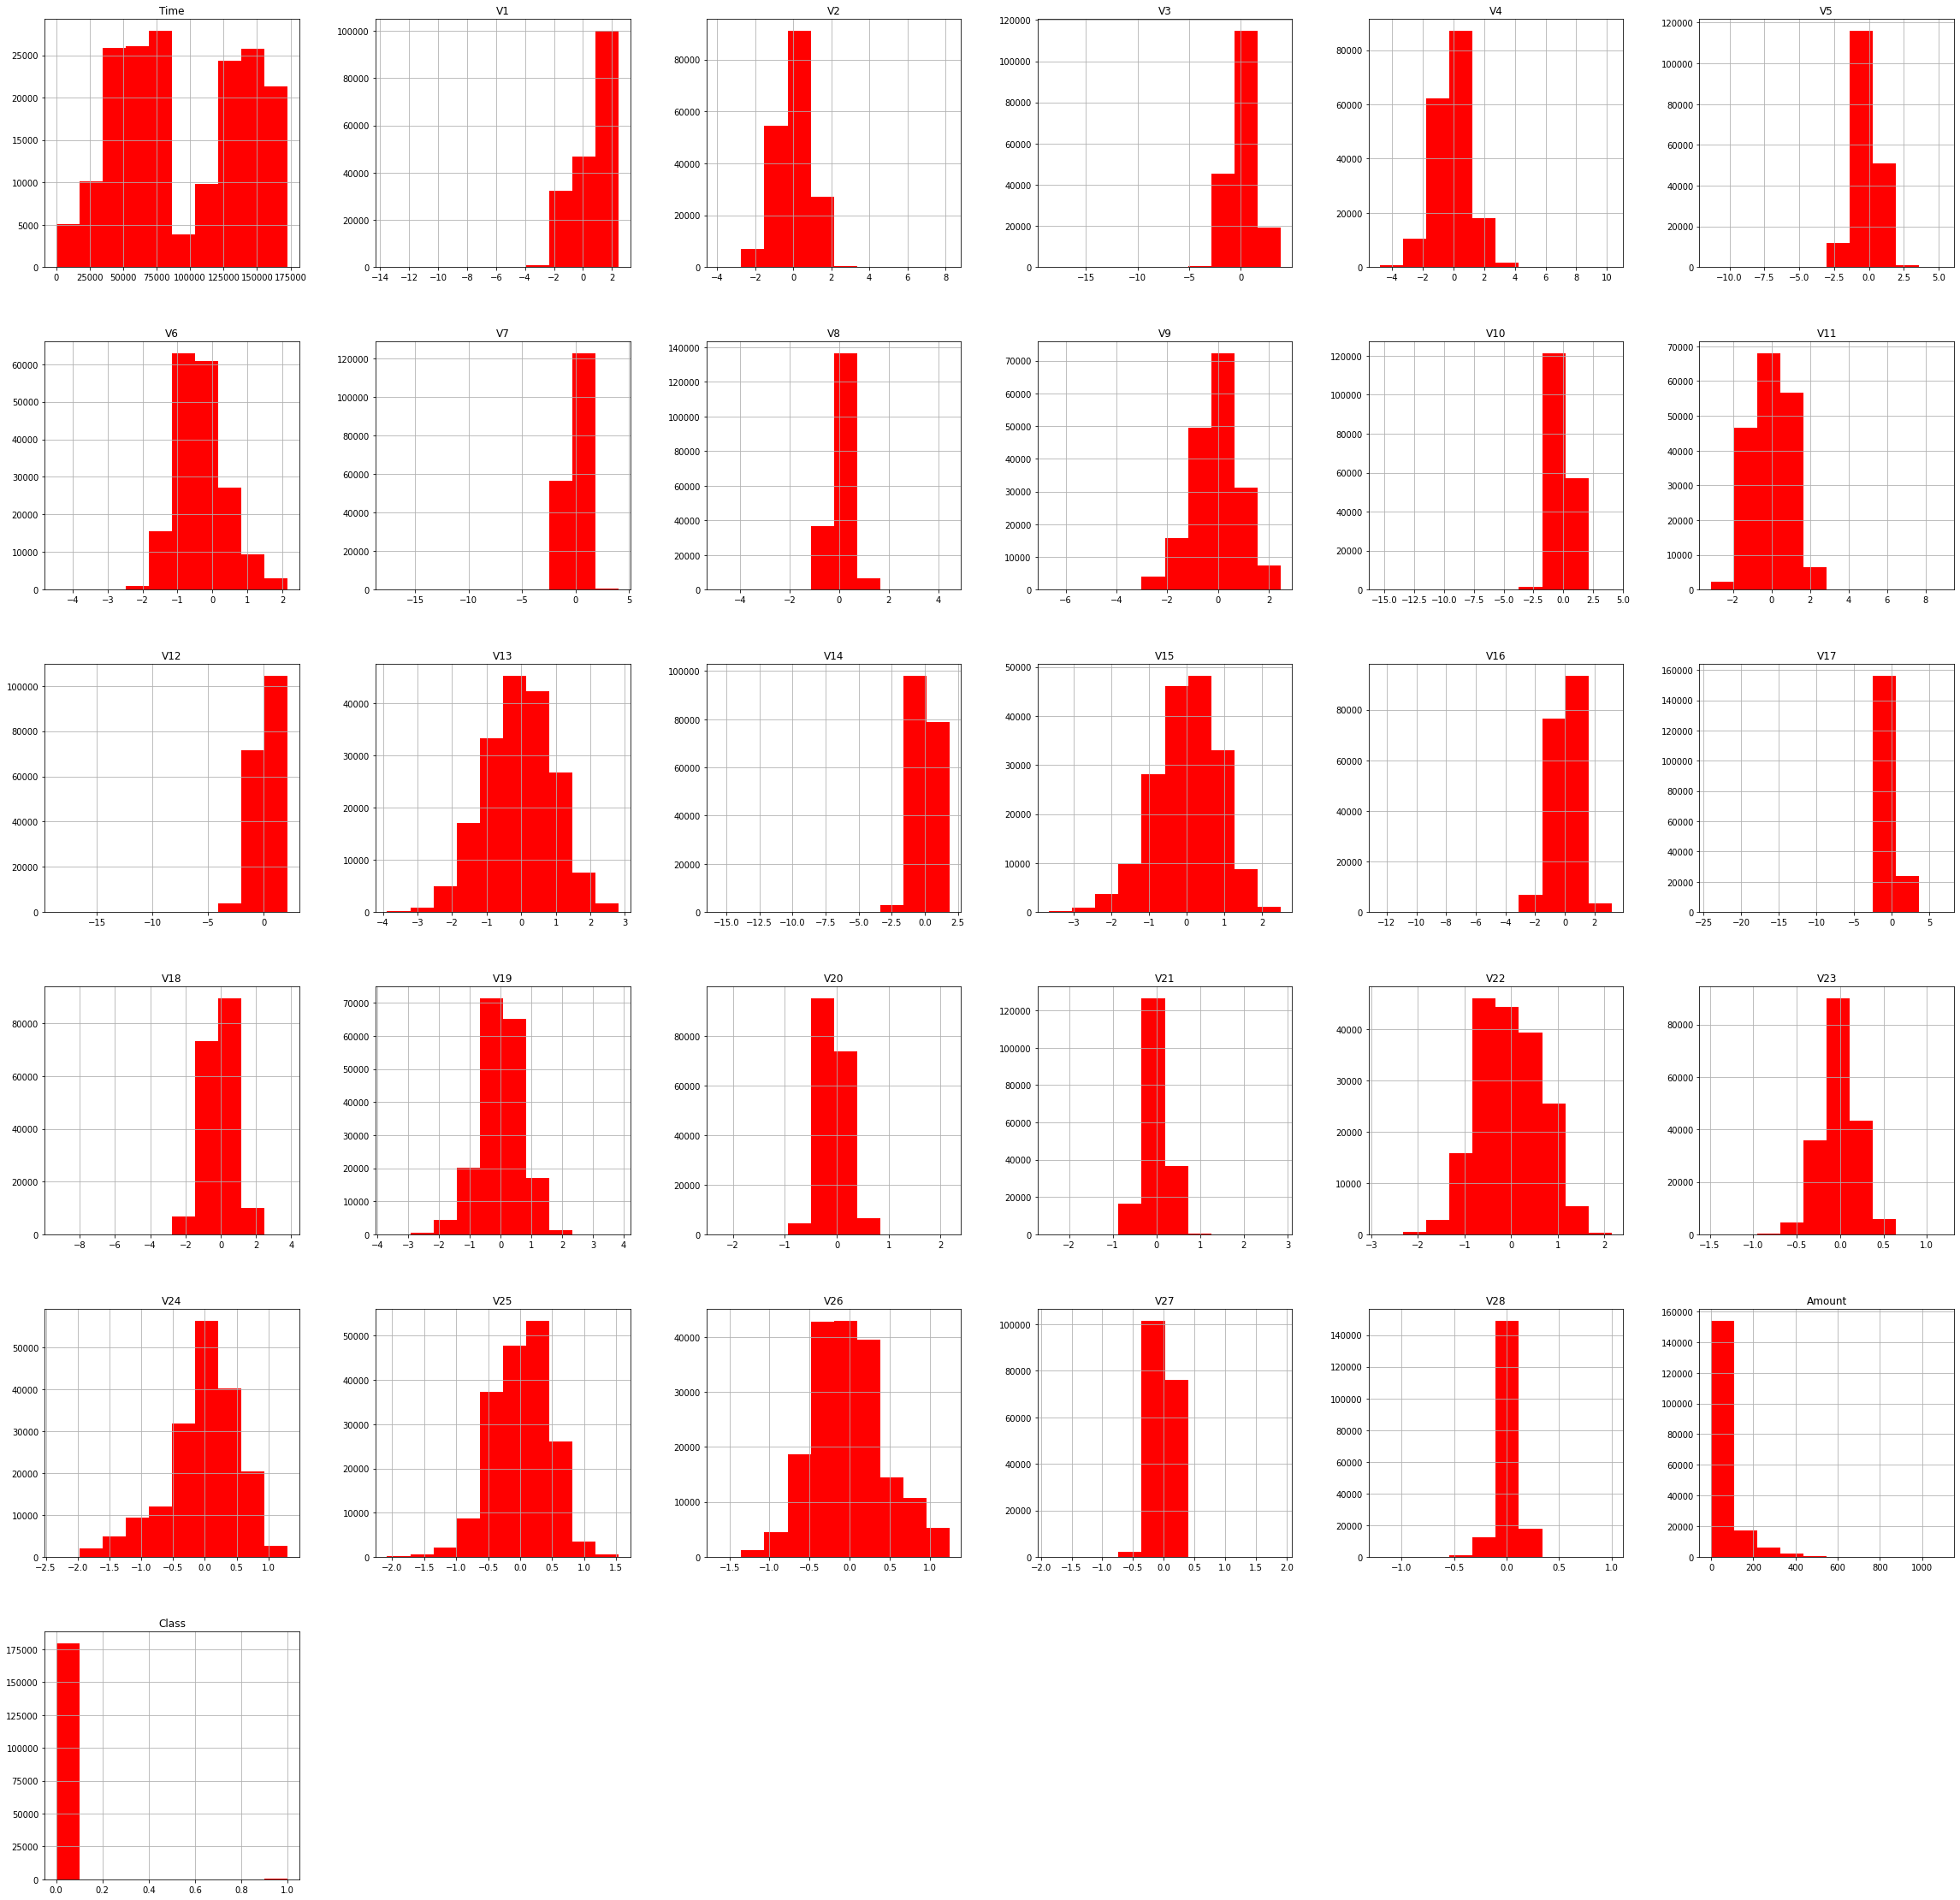

In [26]:
#3. Distribution of the individual features

plt.figure(1) #"Distribution of each feature - with Outliers"
train.hist(figsize = (40,40))

plt.figure(2) #"Distribution of each feature - without Outliers"
train_wout.hist(figsize = (40,40), color="red")

plt.show()

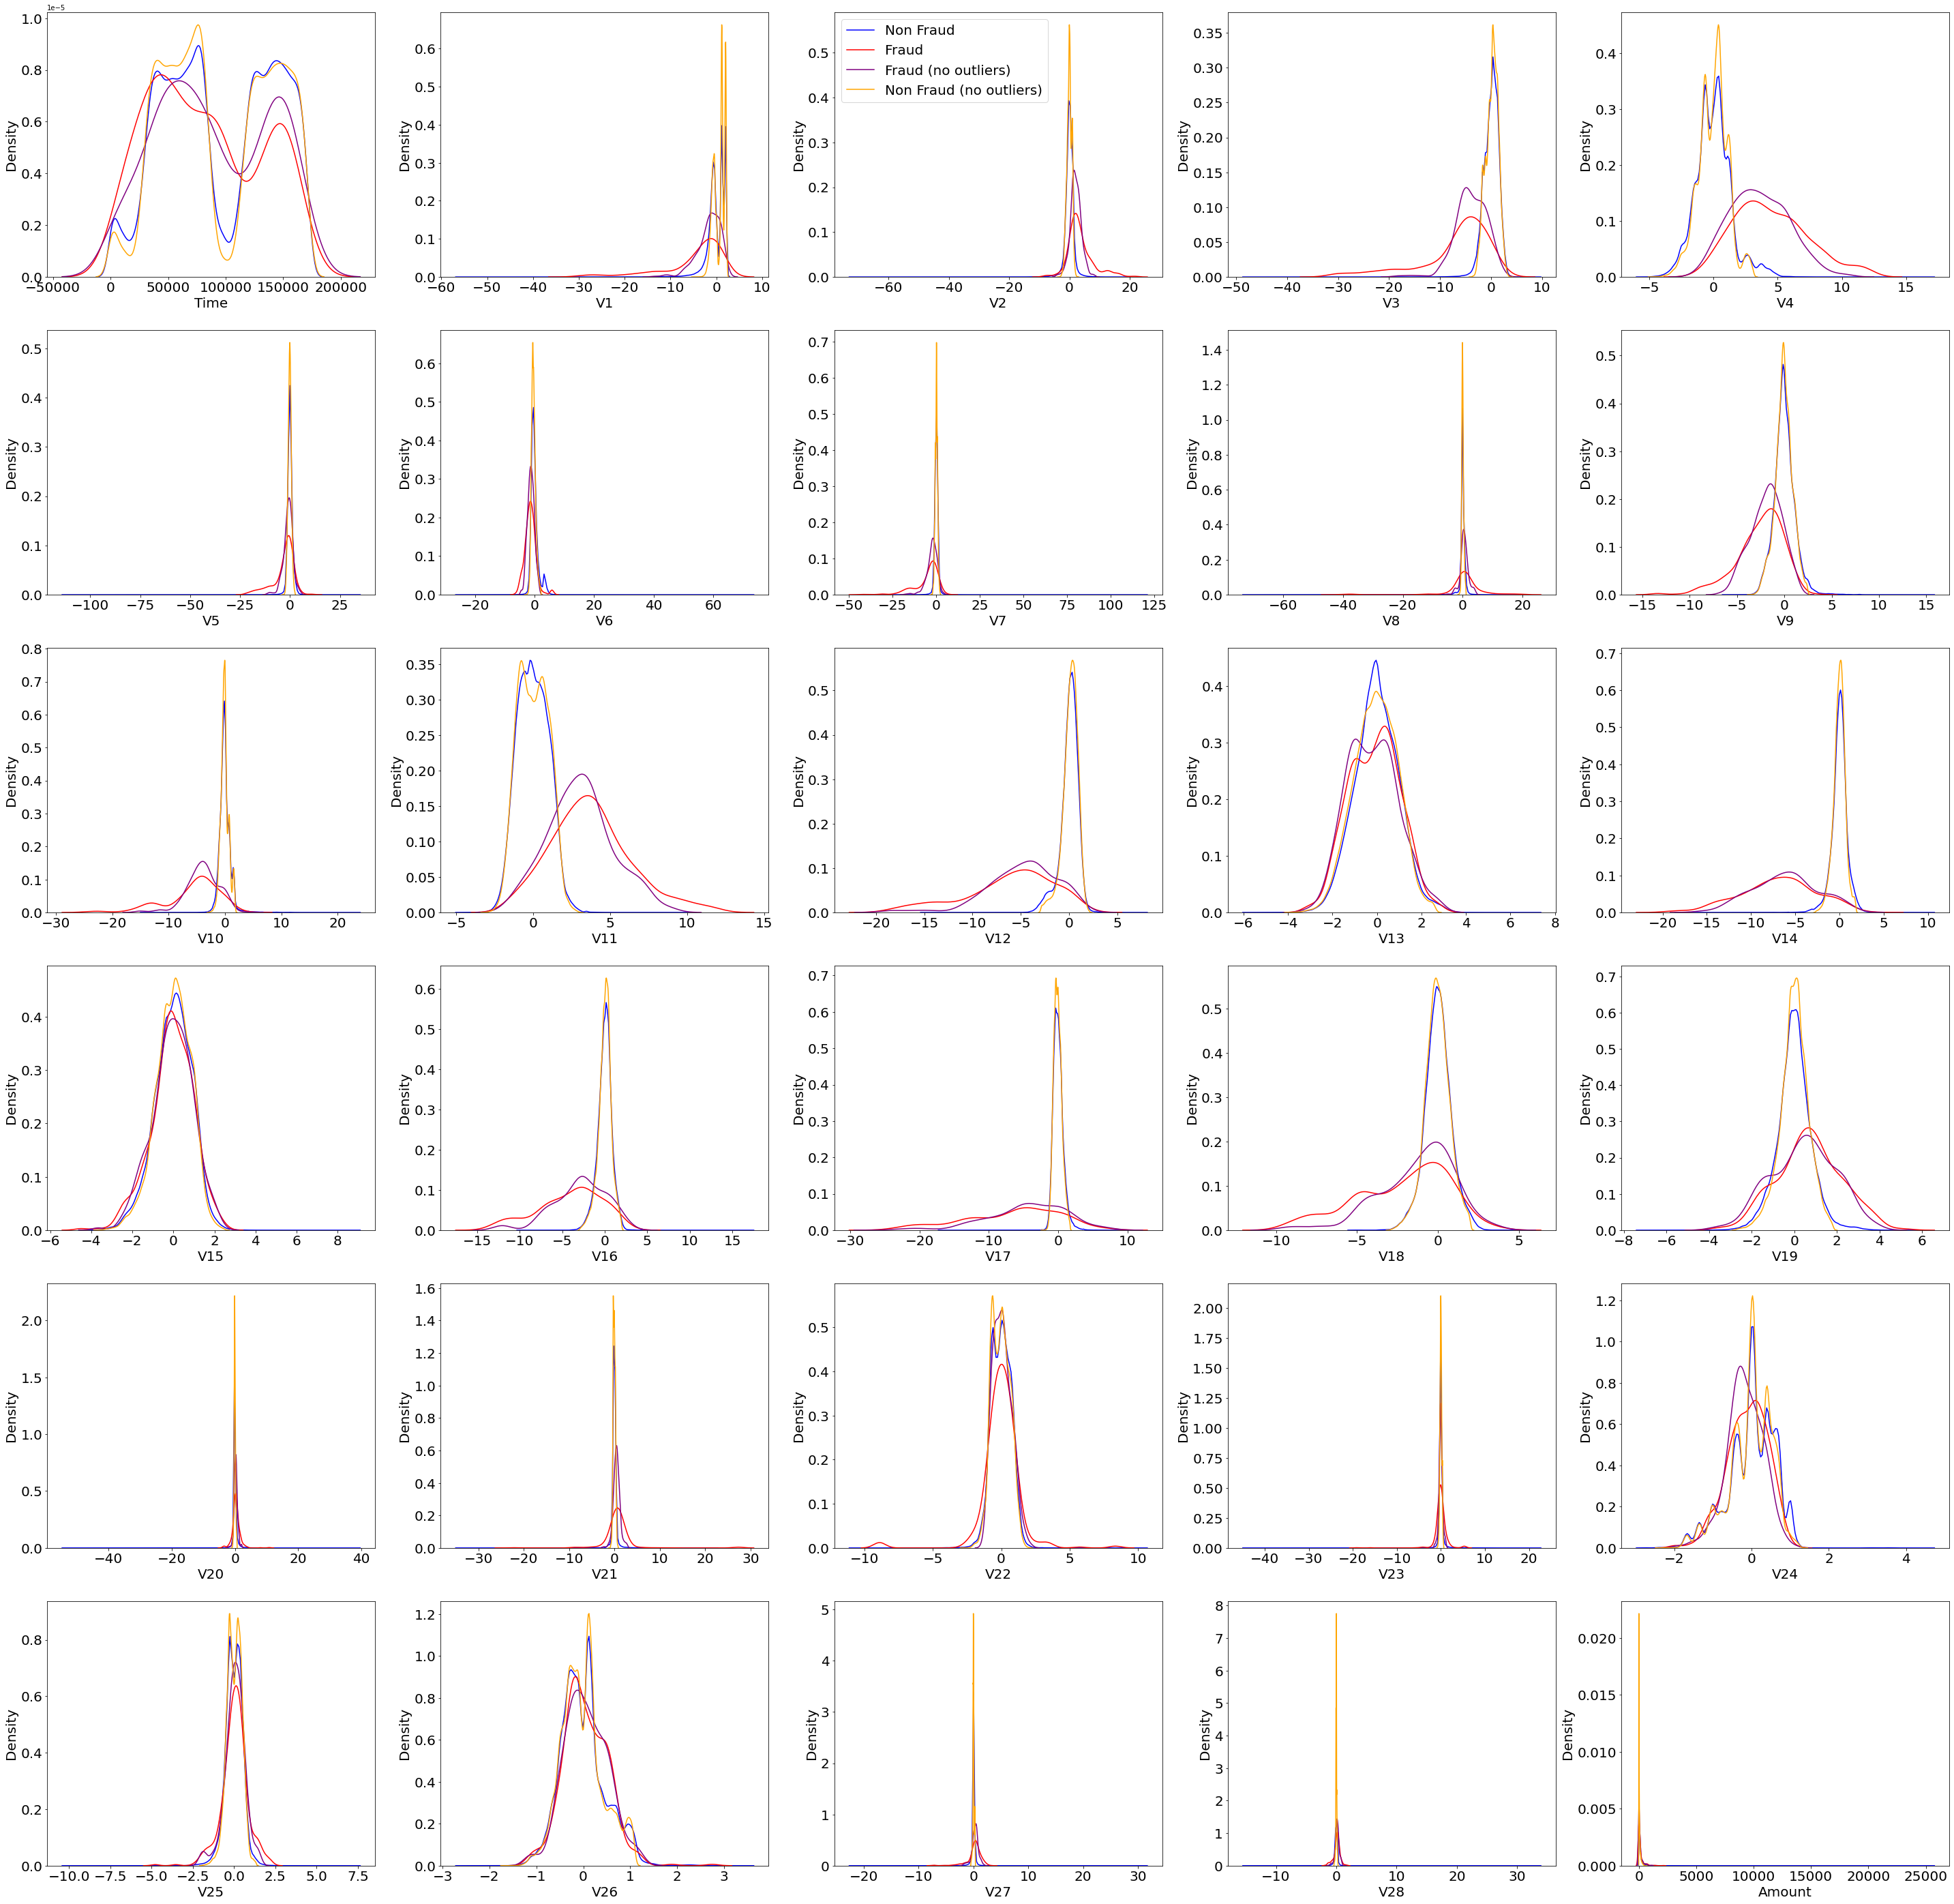

In [27]:
#4. Comparison of the transaction features with and without outliers

sub_nf=train.loc[train['Class']==0]
sub_f=train.loc[train['Class']==1]

sub_nf_out = train_wout.loc[train['Class']==0]
sub_f_out = train_wout.loc[train['Class']==1]

count=1
fig,ax=plt.subplots(6,5,figsize=(50,50))

for feature in train.columns.values[0:30]:
    plt.subplot(6,5,count)
    sns.distplot(sub_nf[feature],label='Non Fraud',hist=False, color="blue")
    sns.distplot(sub_f[feature],label='Fraud',hist=False, color="red")
    sns.distplot(sub_f_out[feature],label='Fraud (no outliers)',hist=False, color="purple")
    sns.distplot(sub_nf_out[feature],label='Non Fraud (no outliers)',hist=False, color="orange")
    plt.xlabel(feature, fontsize=20)
    plt.ylabel("Density", fontsize=20)
    plt.tick_params(axis='x',labelsize=20)
    plt.tick_params(axis='y',labelsize=20)
    if count == 3: plt.legend(prop={'size': 20})
    count+=1

plt.show()

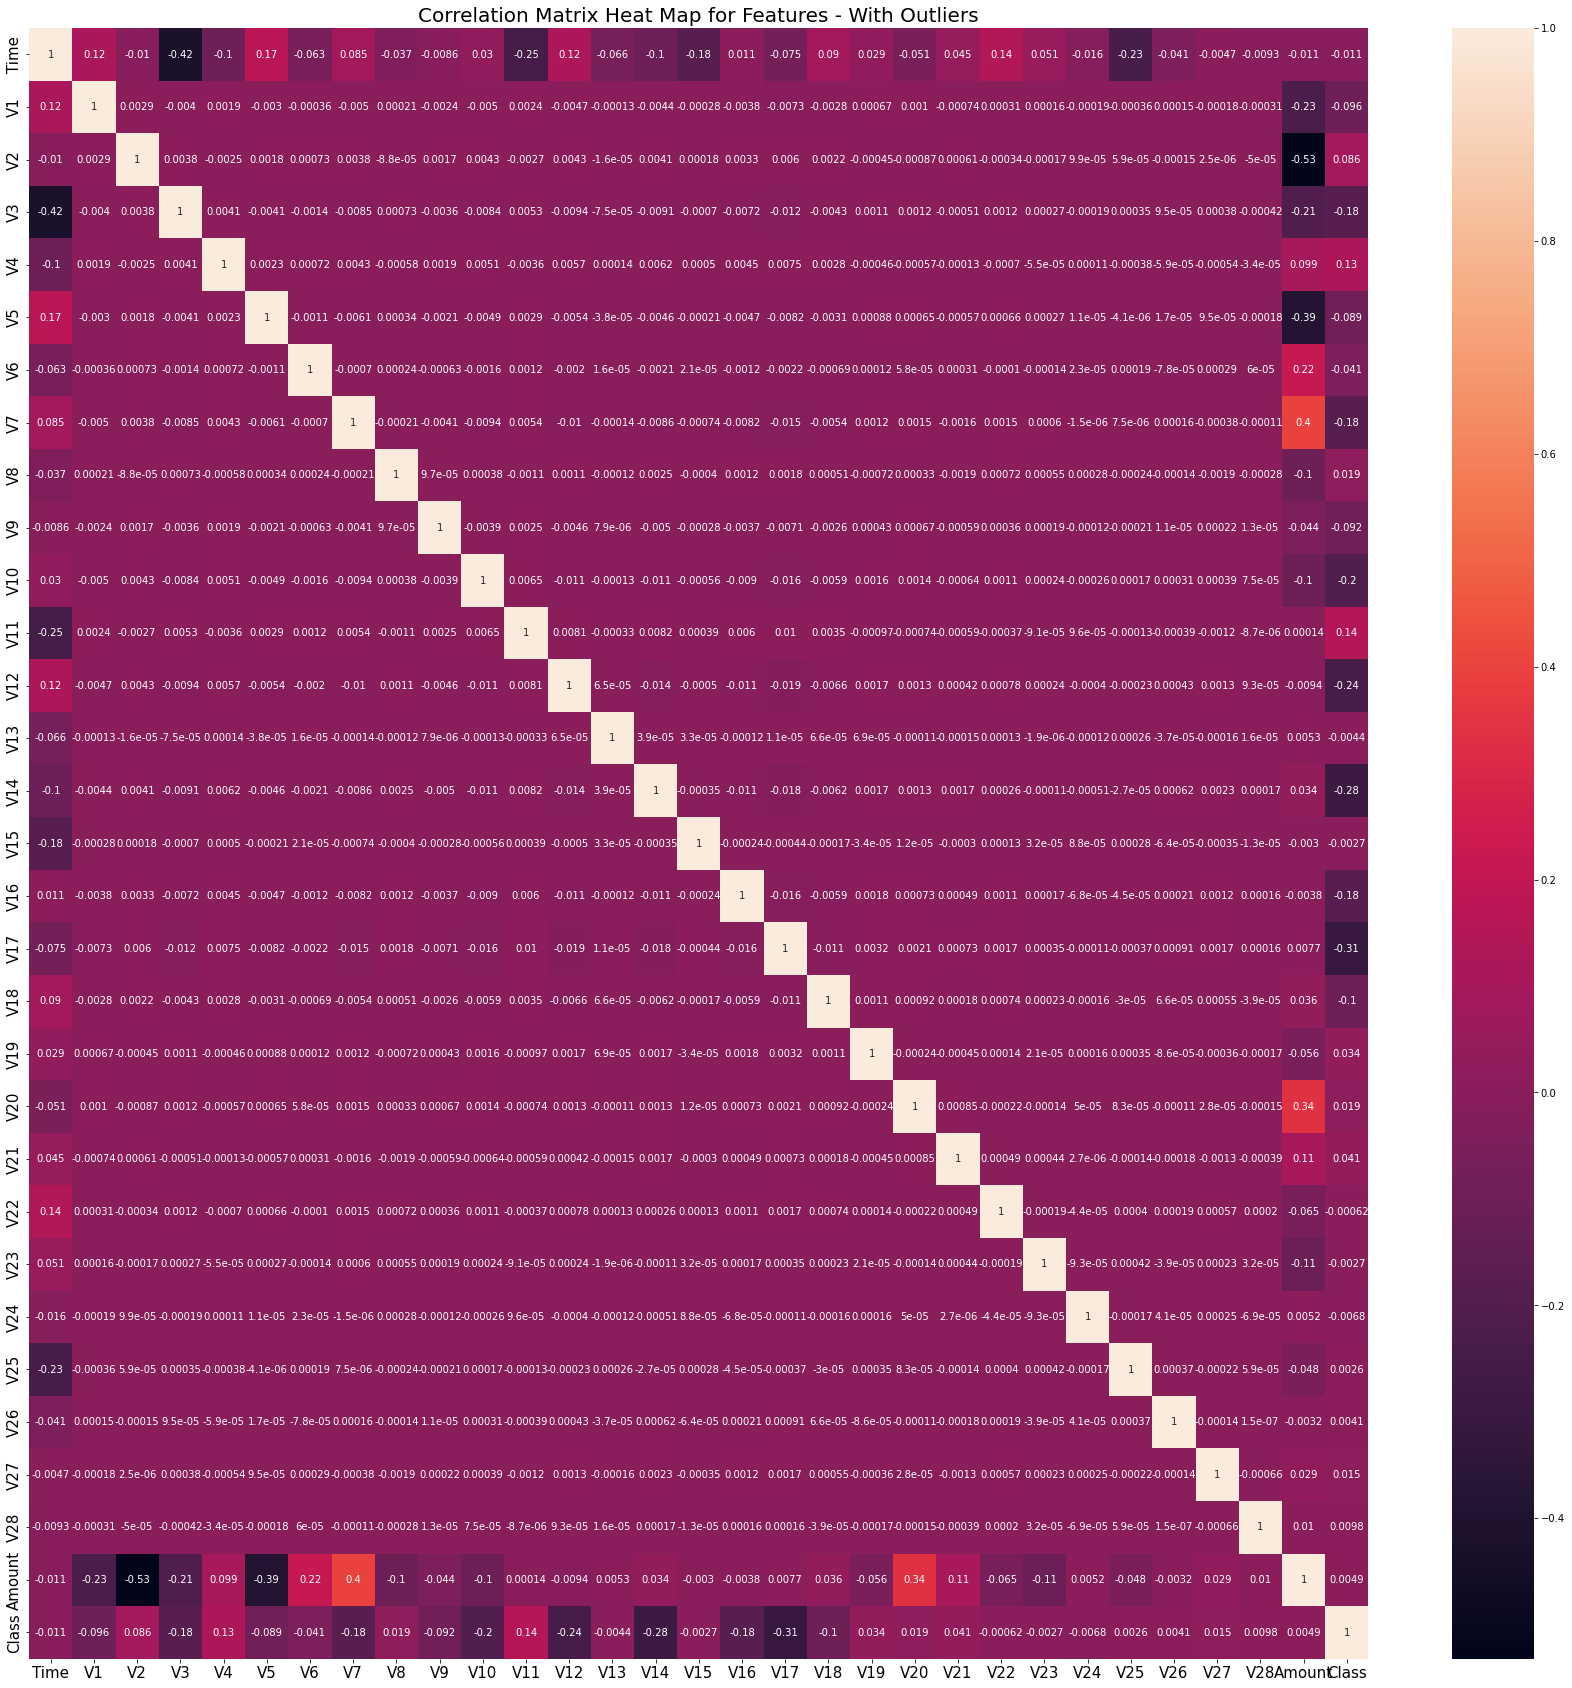

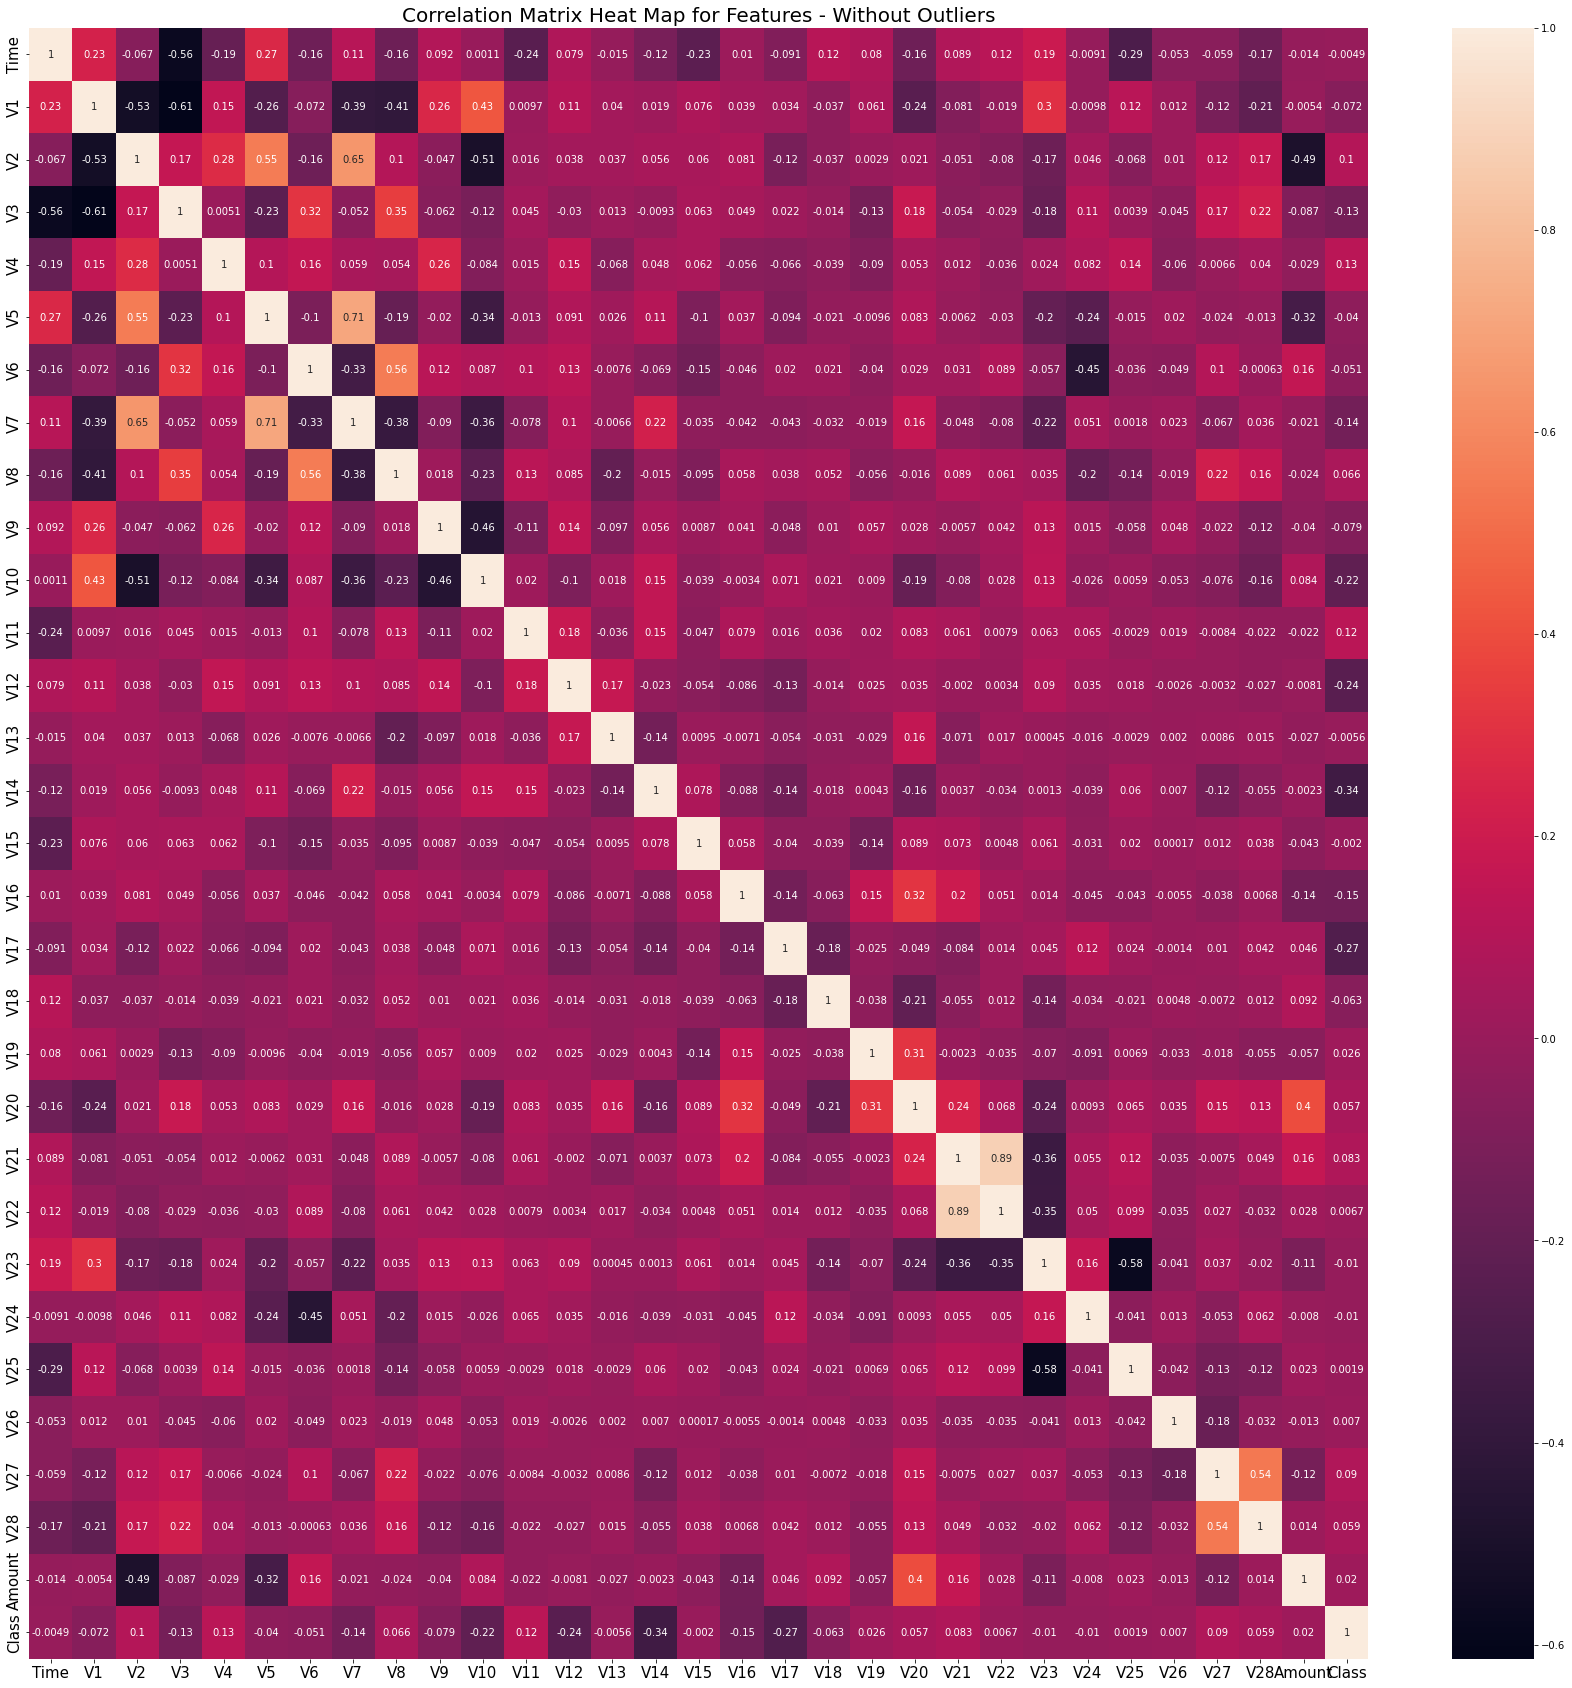

In [28]:
#5.Correlation between the features

plt.figure(1, figsize=(30,30))
plt.title('Correlation Matrix Heat Map for Features - With Outliers', fontsize=20)
sns.heatmap(train.corr(), annot=True) #correlation matric heat map
plt.tick_params(axis='x',labelsize=15)
plt.tick_params(axis='y',labelsize=15)

plt.figure(2, figsize=(30,30))
plt.title('Correlation Matrix Heat Map for Features - Without Outliers', fontsize=20)
sns.heatmap(train_wout.corr(), annot=True)
plt.tick_params(axis='x',labelsize=15)
plt.tick_params(axis='y',labelsize=15)

plt.show()

#### Observation 2.0

In 1 and 2, using various vizualisation plots and techniques I have analyzed the distribution of the transactions in continuous time, as well as vizualized what the indivual transactions look like with respect to time.

Furthermore in 3 and 4, we can see the density, and distribution of each individual feature column with each other. 

Finally, the correlation heapmap in 5 shows us how each of the features are related to each other whether there is a positive or negative correlation.

For comparison's, we can also see the plots with and without outliers. From the plots 1, 2 and 3 we can see significant differnces in the plots. There is times 8 reduction in amplitude in 1, and 25 times reduction in 2, which shows up that the presence of the outliers increased the range of the features by a signififcnat margin. In plot 4, we can see that with or without the outliers the various features still have similar structures when compared with each other, with slight drops in amplitude.

The most significant difference can be noticed in plot 5, where we can see that the removal of outliers shows us a big change in correlation among the features. With the outliers, there is very little correlation between feature (most of the correlation values are lower than 3 decimal places). But as soon as the outliers are removed, we see big changes, 

V27 and V28 - 54%

V25 and V23 - -58%

V21 and V22 - 89%

V8 and V6 - 56%

V7 and V5 - 71%

V7 and V2 - 65%.

I feel that V5 and V22 can be dropped, since they have a really high correlationship with other columns.
We also notice that most of the frauds trancaction are of lower amounts, hence we can normalize the "Amount" features and use them for training as well.

## Module 3: Dimension Reduction

In [29]:
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [30]:
train_wout.drop(["V5", "V22"], axis=1, inplace=True) #dropping column features with high correlation
train_wout.head()

,Time,V1,V2,V3,V4,V6,V7,V8,V9,V10,...,V20,V21,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,0.084968,-0.208254,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


In [31]:
#Using PCA and Random Forest Feature Importance Methods for Dimension Reduction

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

X = train.drop(["Time", "Amount", "Class"], axis=1)
y = train["Class"]
X_out = train_wout.drop(["Time", "Amount", "Class"], axis=1)
y_out = train_wout["Class"]

#to extract important features later
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 101, stratify=y) #split for outliers
X_out_train, X_out_test, y_out_train, y_out_test = train_test_split(X_out, y_out, test_size=0.30, random_state = 101, stratify=y_out) #split without outliers

In [32]:
#using dataset with outliers
scaler = StandardScaler() #scaling the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train = np.array(y_train)

In [33]:
pca = PCA(n_components=28) #PCA to check variance in data
pca.fit(X_train_scaled)

PCA(n_components=28)

In [34]:
def pca_plot(p): #function to plot the Variance graph from PCA
    sns.set(style='whitegrid')
    plt.plot(np.cumsum(p.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.axvline(linewidth=4, color='r', linestyle = '--', x=14, ymin=0, ymax=1)
    display(plt.show())

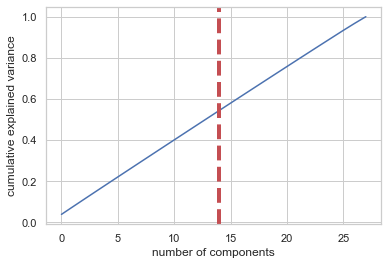

None

In [35]:
pca_plot(pca) #plotting the variance

#from the plot and the following table you cans see that the variance stays alomst constant for all the features

In [36]:
#variance table
evr = pca.explained_variance_ratio_
cvr = np.cumsum(pca.explained_variance_ratio_)
df_pca = pd.DataFrame()
df_pca['Cumulative Variance Ratio'] = cvr
df_pca['Explained Variance Ratio'] = evr
display(df_pca.head(28))

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.038874,0.038874
1,0.075541,0.036667
2,0.112032,0.036492
3,0.148392,0.036360
4,0.184662,0.036270
5,0.220828,0.036166
6,0.256909,0.036081
7,0.292969,0.036060
8,0.328963,0.035994
9,0.364924,0.035961


In [37]:
forest = RandomForestClassifier()
forest.fit(X_train_scaled, y_train)
display(forest.score(X_train_scaled, y_train))
#using Random Forest to select the most important features
#However, in this case all features are important, since the variance is alomst constant

1.0

In [38]:
#function to vizualize the importance of the features
def importance_plot(df,rfc):
    feats = {}
    for feature, importance in zip(df.columns, rfc.feature_importances_):
        feats[feature] = importance
    importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
    importances = importances.sort_values(by='Gini-Importance', ascending=False)
    importances = importances.reset_index()
    importances = importances.rename(columns={'index': 'Features'})
    sns.set(font_scale = 5)
    sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
    fig, ax = plt.subplots()
    fig.set_size_inches(30,15)
    sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
    plt.xlabel('Importance', fontsize=25, weight = 'bold')
    plt.ylabel('Features', fontsize=25, weight = 'bold')
    plt.title('Feature Importance', fontsize=25, weight = 'bold')
    display(plt.show())
    #display(importances)
    return importances["Features"]

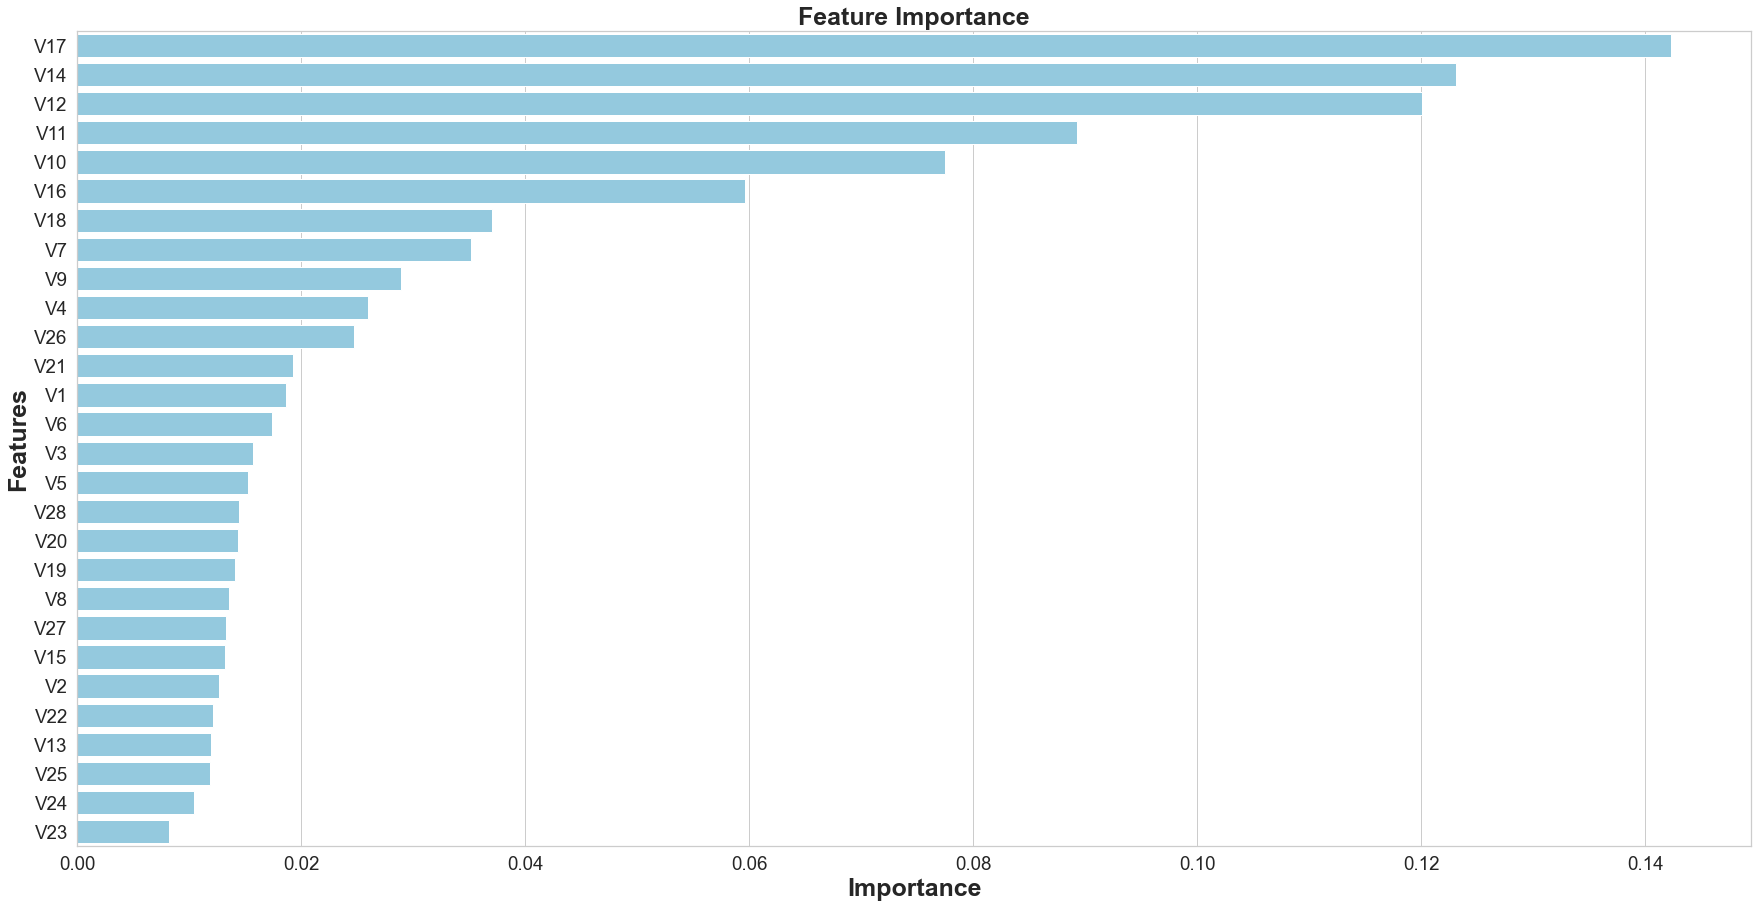

None

,Features
0,V17
1,V14
2,V12
3,V11
4,V10
5,V16
6,V18
7,V7
8,V9
9,V4


In [39]:
imp_feats = importance_plot(X,forest)
df_feats = pd.DataFrame(imp_feats)
df_feats.head(18) #all 28 in order of importance

# 

In [40]:
#dataset without outliers
#X_out_train, X_out_test, y_out_train, y_out_test

scaler = StandardScaler()
X_out_train_scaled = scaler.fit_transform(X_out_train)
X_out_test_scaled = scaler.transform(X_out_test)
y_out_train = np.array(y_out_train)

In [41]:
pca_out = PCA(n_components=26)
pca_out.fit(X_out_train_scaled)

PCA(n_components=26)

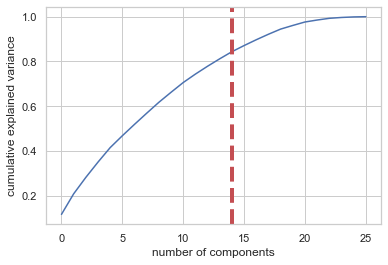

None

In [42]:
pca_plot(pca_out)
#as you can see from the plot and the following table about 18 features are responsible for 92% of the variance
#therefore we can drop the rest and use 18 features for model training

In [43]:
#variance table
evr1 = pca_out.explained_variance_ratio_
cvr1 = np.cumsum(pca_out.explained_variance_ratio_)
df_pca_out = pd.DataFrame()
df_pca_out['Cumulative Variance Ratio'] = cvr1
df_pca_out['Explained Variance Ratio'] = evr1
display(df_pca_out.head(18))

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.115770,0.115770
1,0.207535,0.091766
2,0.281117,0.073582
3,0.349504,0.068387
4,0.414320,0.064815
5,0.467476,0.053157
6,0.518463,0.050986
7,0.568233,0.049770
8,0.617040,0.048807
9,0.661829,0.044789


In [44]:
pca_out1 = PCA(n_components=18) #PCA again to determine the order of importance among the 18 selected
pca_out1.fit(X_out_train_scaled)
X_train_scaled_pca = pca_out1.transform(X_out_train_scaled)
X_test_scaled_pca = pca_out1.transform(X_out_test_scaled)

In [45]:
forest1 = RandomForestClassifier()
forest1.fit(X_train_scaled_pca, y_out_train)
display(forest1.score(X_train_scaled_pca, y_out_train))

1.0

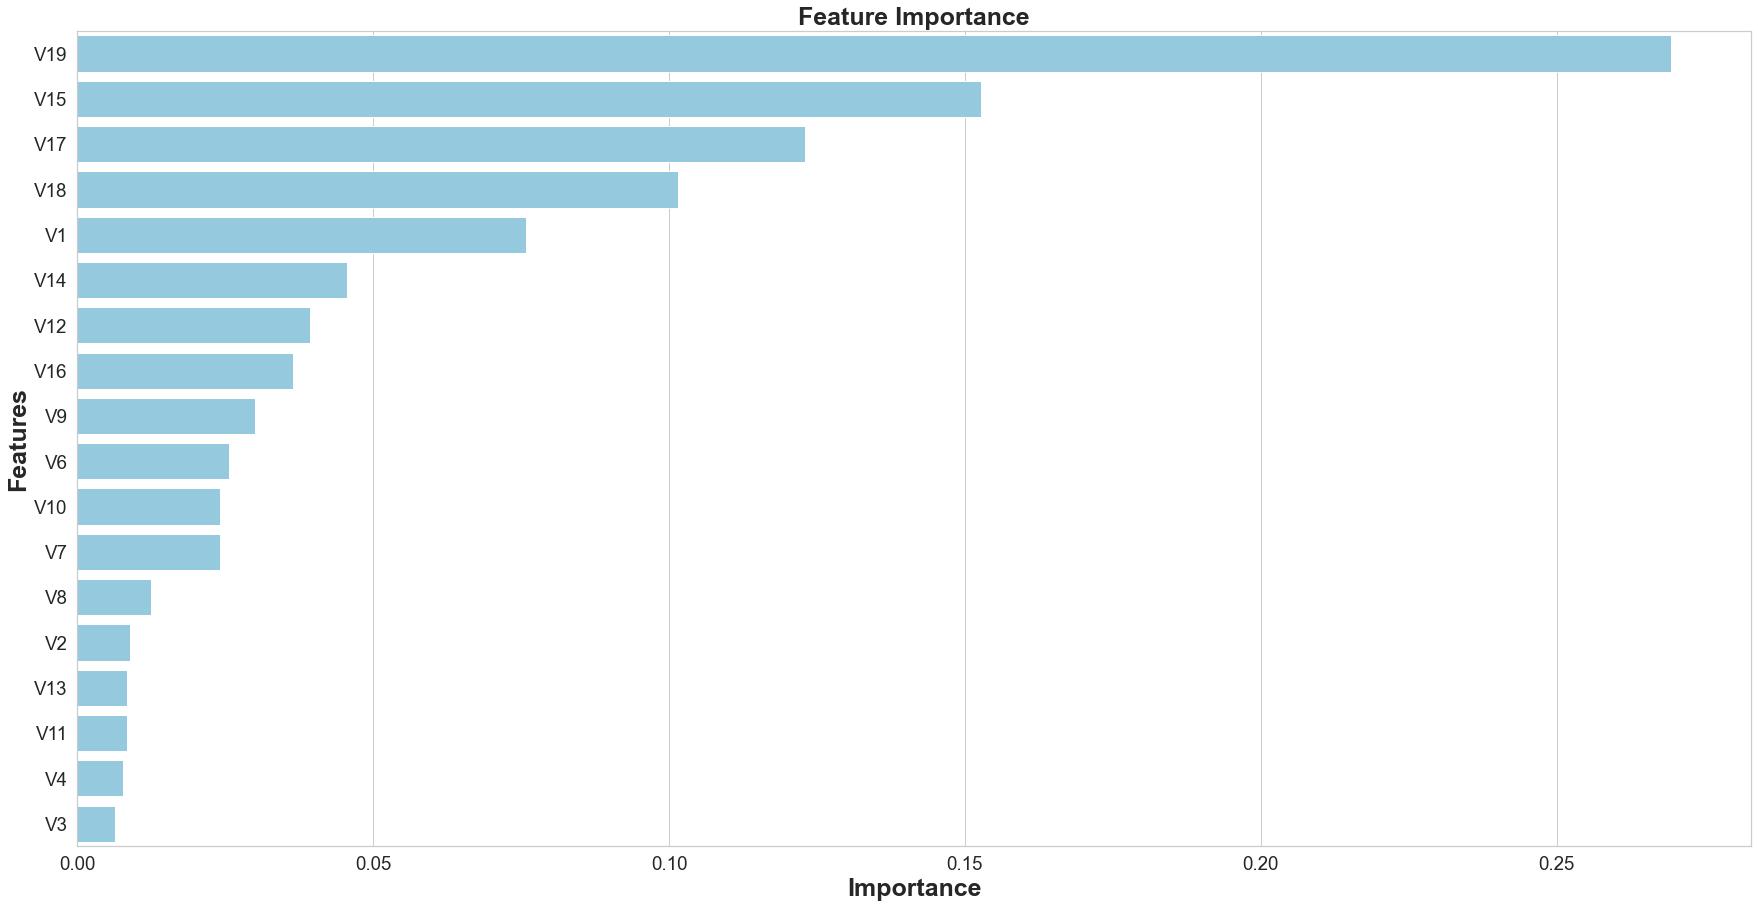

None

,Features
0,V19
1,V15
2,V17
3,V18
4,V1
5,V14
6,V12
7,V16
8,V9
9,V6


In [46]:
imp_feats1 = importance_plot(X_out,forest1)
df_feats1 = pd.DataFrame(imp_feats1[:18])
df_feats1
#V19 is the most important

#### Observation 3.0 

While conducting literature review and reading a few sources i realized that one of the most common unsupervised methods for dimension reduction is by by using PCA to check for feature variance followed by Random Forest Classifier to determine the order of importance of the features for the dataset.

So initially i used PCA to determine the variance of each feature and we see from the first pca plot that the variance for each feature is about the same (dataset with outliers). That means that we will need to use all the features to analyze the entire dataset accurately, then we determined the order of importance for each feature.

However, with outliers removed, I noticed that 18 features were responsible for about 92% of the variance of the dataset. Therefore, we can remove 10 full columns worth of features and and still approximate the dataset to a high degree. After this, I conducted PCA for the 18 feature columns and using Random Forest Classifier found the order of importance of the features. V19 and V15 are the two most important features for the data set.

Continuing on, i have decided to use all 18 of the identified features, we could pick fewer based on the importance.

## Module 4: Classification

In [47]:
###pick 3 classification methods, and methods not in the below list can also be used; you can also pick more than three methods
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, recall_score, ConfusionMatrixDisplay, confusion_matrix, plot_confusion_matrix

In [48]:
#reduced training dataset without outliers
df_train = train_wout[df_feats1["Features"]] #important features selected after dimension reduction
df_train["Class"] = train_wout["Class"]
df_train["Norm_Amount"] = StandardScaler().fit_transform(train_wout["Amount"].values.reshape(-1,1)) #standardizing amount

In [49]:
#reduced testing dataset for df_train_out
df_test = test[df_feats1["Features"]]
df_test["Class"] = test["Class"]
df_test["Norm_Amount"] = StandardScaler().fit_transform(test['Amount'].values.reshape(-1,1)) #standardizing amount

In [50]:
print("The reduced training set has the shape {} and reduced testing dataset has the shape {}\n(without outliers)".format(df_train.shape, df_test.shape))

The reduced training set has the shape (180018, 20) and reduced testing dataset has the shape (150, 20)
(without outliers)


In [51]:
#X and y training
X_train = df_train.drop("Class", axis=1)
y_train = df_train["Class"]

In [52]:
#X and y testing
X_test = df_test.drop("Class", axis=1)
y_test = df_test["Class"]

In [53]:
#undersampling - solution to the highly unbalanced dataset problem

f=len(df_train[df_train['Class'] == 1])
df=df_train[df_train['Class'] == 0].sample(f, random_state = 69)
df1 = df.append(df_train[df_train['Class'] == 1], sort=False).reset_index(drop = True)
l=df1.shape[0]
l1=df1[df1['Class']==1].shape[0]
l0=l1*100/l
print("Percentage of fraud transactions: {}%".format(l0))
x_under = df1.drop("Class", axis=1)
y_under = df1['Class']

Percentage of fraud transactions: 50.0%


### 1. Gaussian Process Classifier Model 

In [54]:
GPC=GridSearchCV(GaussianProcessClassifier(random_state=1), 
                 {'multi_class':['one_vs_rest', 'one_vs_one']},
                 cv=5,
                 n_jobs=-1,
                 return_train_score=False)
#accepts various model parameters and helps identify the best combination

In [55]:
GPC.fit(x_under,y_under.values.ravel()) #fitting the model to the data

GridSearchCV(cv=5, estimator=GaussianProcessClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'multi_class': ['one_vs_rest', 'one_vs_one']})

In [56]:
GPC_res=pd.DataFrame(GPC.cv_results_)
GPC_res #the results of the combination

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_multi_class,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.102348,0.009049,0.003567,0.001331,one_vs_rest,{'multi_class': 'one_vs_rest'},0.957265,0.91453,0.91453,0.957265,0.965517,0.941821,0.022486,1
1,0.087406,0.012150,0.002009,0.000228,one_vs_one,{'multi_class': 'one_vs_one'},0.957265,0.91453,0.91453,0.957265,0.965517,0.941821,0.022486,1


In [57]:
print('The best score is: ',GPC.best_score_)
print('The best parameters are: ',GPC.best_params_)

The best score is:  0.9418213969938108
The best parameters are:  {'multi_class': 'one_vs_rest'}


In [58]:
model=GPC.best_estimator_ #the model
pred=model.predict(X_test) #predictions

In [59]:
#model analysis
print('Classification report - Training Data \n')
print(classification_report(y_under,model.predict(x_under)))

Classification report - Training Data 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       292
           1       1.00      1.00      1.00       292

    accuracy                           1.00       584
   macro avg       1.00      1.00      1.00       584
weighted avg       1.00      1.00      1.00       584



In [60]:
print('Classification report - Testing Data \n')
print(classification_report(y_test,pred))

Classification report - Testing Data 

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       100
           1       0.92      0.94      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



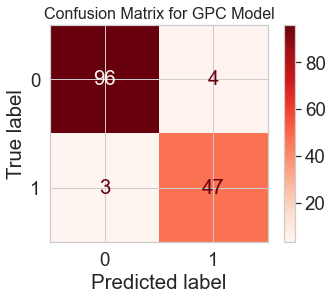

In [61]:
plot_confusion_matrix(GPC,X_test.values,y_test.values,cmap='Reds');
plt.title('Confusion Matrix for GPC Model',size=16,y=1.00);

In [62]:
print('The ROC AUC Score is: ',roc_auc_score(y_test,pred))

The ROC AUC Score is:  0.95


### 2. Support Vector Classifier Model

In [63]:
SVC=GridSearchCV(SVC(random_state=2),
                 {'C':[0.1,1,10,100,300],'kernel':['poly', 'rbf', 'sigmoid'],'gamma':[1,0.1,0.01,0.001]},
                 cv=5,
                 verbose=1,
                 n_jobs=-1,
                 return_train_score=False)

In [64]:
SVC.fit(x_under,y_under.values.ravel())

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=SVC(random_state=2), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 300],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             verbose=1)

In [65]:
SVC_res=pd.DataFrame(SVC.cv_results_)
SVC_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004771,0.001112,0.001334,0.000086,0.1,1,poly,"{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}",0.957265,0.914530,0.923077,0.940171,0.982759,0.943560,0.024487,9
1,0.012319,0.001479,0.006868,0.000871,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.495726,0.495726,0.495726,0.495726,0.525862,0.501754,0.012054,60
2,0.006694,0.001002,0.002292,0.000960,0.1,1,sigmoid,"{'C': 0.1, 'gamma': 1, 'kernel': 'sigmoid'}",0.726496,0.726496,0.803419,0.794872,0.655172,0.741291,0.054009,49
3,0.004778,0.001630,0.001799,0.000785,0.1,0.1,poly,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}",0.974359,0.897436,0.931624,0.974359,0.965517,0.948659,0.030064,4
4,0.012156,0.001589,0.006635,0.002449,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.837607,0.846154,0.888889,0.880342,0.905172,0.871633,0.025712,41
5,0.006157,0.002113,0.001632,0.000124,0.1,0.1,sigmoid,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'sigmoid'}",0.811966,0.769231,0.863248,0.846154,0.758621,0.809844,0.041105,43
6,0.006152,0.003826,0.001556,0.000426,0.1,0.01,poly,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'}",0.940171,0.846154,0.871795,0.897436,0.853448,0.881801,0.034136,39
7,0.006117,0.002568,0.002830,0.000656,0.1,0.01,rbf,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",0.948718,0.863248,0.931624,0.948718,0.948276,0.928117,0.033092,28
8,0.007112,0.003704,0.001473,0.000107,0.1,0.01,sigmoid,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'sigmoid'}",0.940171,0.863248,0.923077,0.914530,0.922414,0.912688,0.026098,34
9,0.008961,0.002208,0.002168,0.000067,0.1,0.001,poly,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'poly'}",0.589744,0.547009,0.623932,0.564103,0.500000,0.564957,0.041556,59


In [66]:
print('The best parameters are: ',SVC.best_params_)
print('The best score is: ',SVC.best_score_)

The best parameters are:  {'C': 300, 'gamma': 0.001, 'kernel': 'rbf'}
The best score is:  0.9589301503094607


In [67]:
model=SVC.best_estimator_
pred=model.predict(X_test)

In [68]:
print('Classification report - Training Data\n')
print(classification_report(y_under,model.predict(x_under)))

Classification report - Training Data

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       292
           1       0.99      0.95      0.97       292

    accuracy                           0.97       584
   macro avg       0.97      0.97      0.97       584
weighted avg       0.97      0.97      0.97       584



In [69]:
print('Classification report - Test Data\n')
print(classification_report(y_test,pred))

Classification report - Test Data

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       100
           1       0.79      0.96      0.86        50

    accuracy                           0.90       150
   macro avg       0.88      0.92      0.89       150
weighted avg       0.91      0.90      0.90       150



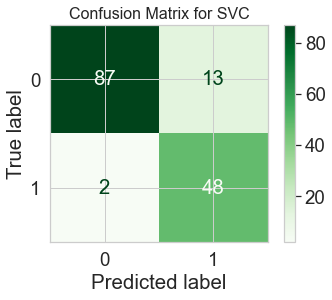

In [70]:
plot_confusion_matrix(SVC,X_test.values,y_test.values,cmap='Greens');
plt.title('Confusion Matrix for SVC',size=16,y=1.00);

In [71]:
print('The ROC AUC Score is: ',roc_auc_score(y_test,pred))

The ROC AUC Score is:  0.915


### 3. Random Forest Model

In [72]:
RFC=GridSearchCV(RandomForestClassifier(random_state=3),
                 {'n_estimators':[50,100,300],'max_depth':[5,8,15,25],'min_samples_split':[2,5,10,15,50]},
                 cv=5,
                 n_jobs=-1,
                 return_train_score=False,
                 verbose=1)

In [73]:
RFC.fit(x_under,y_under.values.ravel())

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=3), n_jobs=-1,
             param_grid={'max_depth': [5, 8, 15, 25],
                         'min_samples_split': [2, 5, 10, 15, 50],
                         'n_estimators': [50, 100, 300]},
             verbose=1)

In [74]:
RFC_res=pd.DataFrame(RFC.cv_results_)
RFC_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.086892,0.005060,0.004875,0.001454,5,2,50,"{'max_depth': 5, 'min_samples_split': 2, 'n_es...",0.965812,0.888889,0.940171,0.974359,0.956897,0.945225,0.030358,30
1,0.171231,0.004906,0.009264,0.002395,5,2,100,"{'max_depth': 5, 'min_samples_split': 2, 'n_es...",0.957265,0.888889,0.940171,0.974359,0.956897,0.943516,0.029376,44
2,0.477142,0.008343,0.026599,0.002504,5,2,300,"{'max_depth': 5, 'min_samples_split': 2, 'n_es...",0.957265,0.888889,0.940171,0.974359,0.956897,0.943516,0.029376,44
3,0.076819,0.002596,0.004579,0.001585,5,5,50,"{'max_depth': 5, 'min_samples_split': 5, 'n_es...",0.974359,0.888889,0.948718,0.974359,0.956897,0.948644,0.031500,2
4,0.158119,0.004988,0.010241,0.002940,5,5,100,"{'max_depth': 5, 'min_samples_split': 5, 'n_es...",0.957265,0.888889,0.940171,0.974359,0.956897,0.943516,0.029376,44
5,0.463763,0.008134,0.027243,0.002123,5,5,300,"{'max_depth': 5, 'min_samples_split': 5, 'n_es...",0.965812,0.888889,0.940171,0.974359,0.956897,0.945225,0.030358,30
6,0.081004,0.007598,0.004940,0.001842,5,10,50,"{'max_depth': 5, 'min_samples_split': 10, 'n_e...",0.957265,0.897436,0.948718,0.965812,0.956897,0.945225,0.024499,30
7,0.157202,0.003211,0.007873,0.002748,5,10,100,"{'max_depth': 5, 'min_samples_split': 10, 'n_e...",0.957265,0.888889,0.940171,0.974359,0.956897,0.943516,0.029376,44
8,0.469152,0.007549,0.025046,0.002006,5,10,300,"{'max_depth': 5, 'min_samples_split': 10, 'n_e...",0.957265,0.888889,0.948718,0.974359,0.948276,0.943501,0.028893,54
9,0.078314,0.002558,0.006752,0.002768,5,15,50,"{'max_depth': 5, 'min_samples_split': 15, 'n_e...",0.957265,0.897436,0.940171,0.974359,0.965517,0.946950,0.027203,6


In [75]:
print('The best parameters are: ',RFC.best_params_)
print('The best score is: ',RFC.best_score_)

The best parameters are:  {'max_depth': 8, 'min_samples_split': 15, 'n_estimators': 300}
The best score is:  0.9486737400530505


In [76]:
model=RFC.best_estimator_
pred=model.predict(X_test)

In [77]:
print('Classification report - Training Data\n')
print(classification_report(y_under,model.predict(x_under)))

Classification report - Training Data

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       292
           1       1.00      0.95      0.97       292

    accuracy                           0.97       584
   macro avg       0.97      0.97      0.97       584
weighted avg       0.97      0.97      0.97       584



In [78]:
print('Classification report - Testing Data\n')
print(classification_report(y_test,pred))

Classification report - Testing Data

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       100
           1       0.82      0.94      0.88        50

    accuracy                           0.91       150
   macro avg       0.90      0.92      0.91       150
weighted avg       0.92      0.91      0.91       150



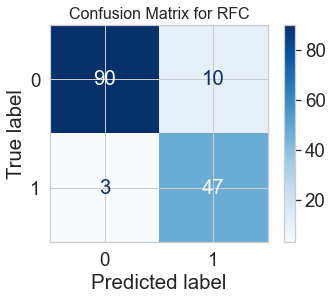

In [79]:
plot_confusion_matrix(RFC,X_test.values,y_test.values,cmap='Blues');
plt.title('Confusion Matrix for RFC',size=16,y=1.00);

In [80]:
print('The ROC AUC Score is: ',roc_auc_score(y_test,pred))

The ROC AUC Score is:  0.92


#### Observation 4.0

After reducing the dataset dimensions, I narrowed down the feature columns to 19 features (inclluding normalized amount). And trained 3 models with the data using 5-fold cross validation - Gaussian Process Classifier Model, Support Vector Classifier Model and the Random Forest Classifier Model. After training and testing, I can say that the the GPC Model was the best with the highest accuracy (95%) and showed 100% precision and recall from the classification report.

In the end I decided to test the models using the dataset without the outliers, since the dataset with the outliers didnt really undergo any dimension reduction (atleast 25 of 28 features were needed to approximate the dataset, and it didnt seem worth it.)

## Module 5: Summary

Note: Detailed observations have been documented in each module

After having a quick look at the dataset I realised the following things: The features arent labelled and the Dataset is highly unbalanced. The best solution to a highly unbalanced dataset is undersampling of the data for training, which is what i did. I also had a look at the null values, duplicate values, outliers as well as the general distribution of the data. I decided to drop the null values, keep the duplicates and wanted to test the importance of the outliers in the data set. I made a deep copy of the dataframe and removed the outliers only from the copy and proceeded into the data vizualization step to see how the outliers effect the data.

I used the following plots to vizualize the data: a dist plot to have a loop at the general distribution of the data, an lmplot to see a scatter of the data and how non-frauds and frauds are related, df.hist for each indidual feature to see how they are distributed respective to each other, as well as correlation heap map. From each indidual plot we learnt about the relevance of certain features and I realised that the outliers have a very significant effect on the data. Without the outliers we see a closer relationship between the various features.

28 features with roughly 200,000 values is alot of data for the model and can cause problems. Hence for to reduce dataframe dimensions i used the Principal Component Analysis + Random Forest Importance extraction method. And again, with vs without outliers in the dataframe had a significant effect. With outlier removed, i managed to reduce the number of features from 28 to 18 (which can still approximate the dataset to higher than 92%). And then identified the order of importance, but choose to use all 18 for model training.

Before we started training the model, i used undersampling to even out the frauds vs non-frauds in the new training datasets. And then trained and tested three models - Gaussian Process Classifier, Support Vector Classifier and Random Forest Classifier. From the various model analysis metrics (roc auc, classification report and the confusion matrix) i have found the GPC to be the best performing model with a perfect 100% precision and recall and 95% accuracy.